Matplotlib plt

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = './raw_sales.csv'


In [212]:
pd.read_csv(path)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [213]:
df = pd.read_csv(path)



In [269]:
#지정된 열을 날짜/시간 형식으로 자동 변환
raw = pd.read_csv(path, parse_dates=['datesold'])

sales = raw.copy()

In [270]:
sales.shape

(29580, 5)

In [271]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [272]:
#연도만 추출

sales['datesold']

0       2007-02-07
1       2007-02-27
2       2007-03-07
3       2007-03-09
4       2007-03-21
           ...    
29575   2019-07-25
29576   2019-07-25
29577   2019-07-26
29578   2019-07-26
29579   2019-07-26
Name: datesold, Length: 29580, dtype: datetime64[ns]

In [273]:
sales['datesold'].dt.year

0        2007
1        2007
2        2007
3        2007
4        2007
         ... 
29575    2019
29576    2019
29577    2019
29578    2019
29579    2019
Name: datesold, Length: 29580, dtype: int32

In [274]:
sales['year'] = sales['datesold'].dt.year
#연도만 추출 >> 연도 새 열 생성
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [275]:
#연도별 평균가격

sales.groupby('year')['price'].agg('mean')

year
2007    522377.210884
2008    493814.162754
2009    496092.032959
2010    559564.810289
2011    566715.110227
2012    552501.369214
2013    553416.296838
2014    592653.761439
2015    626101.342654
2016    635185.311668
2017    671880.551420
2018    660701.042768
2019    634184.218773
Name: price, dtype: float64

In [276]:
round(sales.groupby('year')['price'].agg('mean'),1)


year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
2012    552501.4
2013    553416.3
2014    592653.8
2015    626101.3
2016    635185.3
2017    671880.6
2018    660701.0
2019    634184.2
Name: price, dtype: float64

In [277]:
result = round(sales.groupby('year')['price'].agg('mean'),1)
result[:5]

year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
Name: price, dtype: float64

In [278]:
result.index

Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019],
      dtype='int32', name='year')

In [279]:
result.values

array([522377.2, 493814.2, 496092. , 559564.8, 566715.1, 552501.4,
       553416.3, 592653.8, 626101.3, 635185.3, 671880.6, 660701. ,
       634184.2])

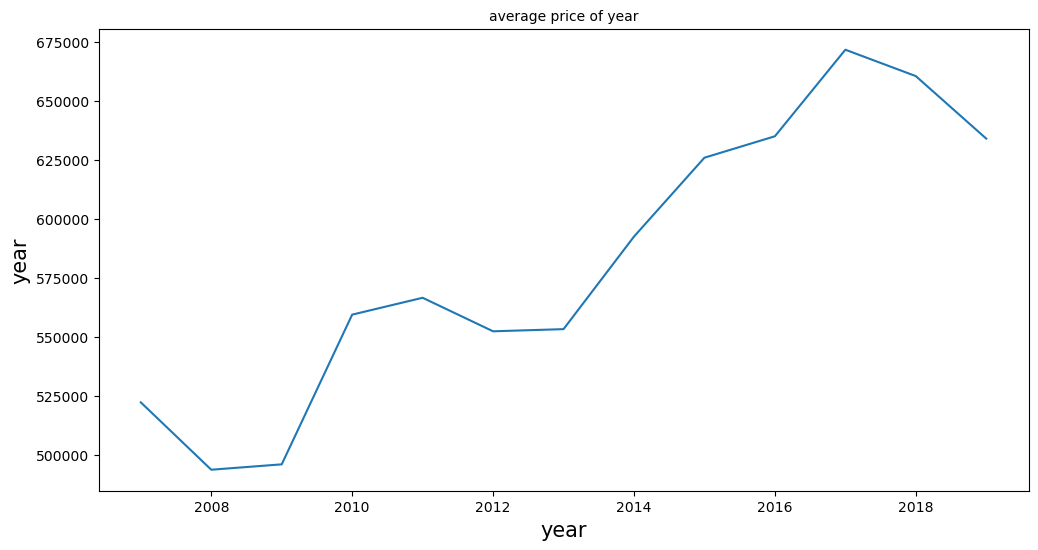

In [280]:
# 시간의 변동에 따른 추세를 보고 싶어요. 
# 선 그래프(line graph)

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(result.index, result.values) #plot(x,y)

ax.set_title('average price of year', size=10)
ax.set_xlabel('year', size=15)
ax.set_ylabel('year', size=15)

plt.savefig('./average price of year.png')

plt.show()

In [281]:
#막대그래프

sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [282]:
#월별 막대그래프를 x축 기준
#2007년, 2008년도 병립 
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month

In [283]:
sales.head(3)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3


In [284]:
sales['year'].isin([2007,2008,2009])

0         True
1         True
2         True
3         True
4         True
         ...  
29575    False
29576    False
29577    False
29578    False
29579    False
Name: year, Length: 29580, dtype: bool

In [285]:
condition = sales['year'].isin([2007,2008,2009])

sales.loc[condition, :]

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
24802,2009-12-22,2606,335000,unit,2,2009,12
24803,2009-12-22,2606,350000,unit,2,2009,12
24804,2009-12-23,2603,330000,unit,1,2009,12
24805,2009-12-24,2606,366000,unit,2,2009,12


In [302]:
df = sales.loc[condition, :]

df.tail()

,datesold,postcode,price,propertyType,bedrooms,year,month
24802,2009-12-22,2606,335000,unit,2,2009,12
24803,2009-12-22,2606,350000,unit,2,2009,12
24804,2009-12-23,2603,330000,unit,1,2009,12
24805,2009-12-24,2606,366000,unit,2,2009,12
24806,2009-12-24,2617,367000,unit,2,2009,12


In [303]:
# 연도별, 월별 평균 가격을 알고 싶어요 

round(df.groupby(['year','month'])['price'].agg('mean'), 1)

year  month
2007  2        407500.0
      3        339333.3
      4        798000.0
      5        339500.0
      6        520333.3
      7        592078.9
      8        505608.7
      9        556875.0
      10       498600.0
      11       505442.3
      12       505737.0
2008  1        504428.6
      2        531080.0
      3        563500.0
      4        534204.5
      5        522394.7
      6        539092.6
      7        537453.1
      8        449510.4
      9        496778.7
      10       454822.0
      11       489546.3
      12       494410.8
2009  1        482238.6
      2        459281.6
      3        493931.2
      4        497882.6
      5        477808.7
      6        479053.2
      7        495982.1
      8        485465.9
      9        499597.2
      10       501456.3
      11       546882.3
      12       524921.4
Name: price, dtype: float64

In [304]:
result = round(df.groupby(['year','month'])['price'].agg('mean'), 1)

result.head()

year  month
2007  2        407500.0
      3        339333.3
      4        798000.0
      5        339500.0
      6        520333.3
Name: price, dtype: float64

In [306]:
result.index


MultiIndex([(2007,  2),
            (2007,  3),
            (2007,  4),
            (2007,  5),
            (2007,  6),
            (2007,  7),
            (2007,  8),
            (2007,  9),
            (2007, 10),
            (2007, 11),
            (2007, 12),
            (2008,  1),
            (2008,  2),
            (2008,  3),
            (2008,  4),
            (2008,  5),
            (2008,  6),
            (2008,  7),
            (2008,  8),
            (2008,  9),
            (2008, 10),
            (2008, 11),
            (2008, 12),
            (2009,  1),
            (2009,  2),
            (2009,  3),
            (2009,  4),
            (2009,  5),
            (2009,  6),
            (2009,  7),
            (2009,  8),
            (2009,  9),
            (2009, 10),
            (2009, 11),
            (2009, 12)],
           names=['year', 'month'])

In [307]:
result.reset_index().iloc[::3, :]

,year,month,price
0,2007,2,407500.0
3,2007,5,339500.0
6,2007,8,505608.7
9,2007,11,505442.3
12,2008,2,531080.0
15,2008,5,522394.7
18,2008,8,449510.4
21,2008,11,489546.3
24,2009,2,459281.6
27,2009,5,477808.7


In [308]:
result.reset_index()


,year,month,price
0,2007,2,407500.0
1,2007,3,339333.3
2,2007,4,798000.0
3,2007,5,339500.0
4,2007,6,520333.3
5,2007,7,592078.9
6,2007,8,505608.7
7,2007,9,556875.0
8,2007,10,498600.0
9,2007,11,505442.3


In [309]:
result = result.reset_index()

result.head()

,year,month,price
0,2007,2,407500.0
1,2007,3,339333.3
2,2007,4,798000.0
3,2007,5,339500.0
4,2007,6,520333.3


In [310]:
result['year'].unique()


array([2007, 2008, 2009])

In [311]:
result.loc[result['year'] == 2007, :]


,year,month,price
0,2007,2,407500.0
1,2007,3,339333.3
2,2007,4,798000.0
3,2007,5,339500.0
4,2007,6,520333.3
5,2007,7,592078.9
6,2007,8,505608.7
7,2007,9,556875.0
8,2007,10,498600.0
9,2007,11,505442.3


In [312]:
result_2007 = result.loc[result['year'] == 2007, :]
result_2008 = result.loc[result['year'] == 2008, :]
result_2009 = result.loc[result['year'] == 2009, :]

print(result_2007[:3])
print()
print(result_2008[:3])
print()
print(result_2009[:3])
print()

   year  month     price
0  2007      2  407500.0
1  2007      3  339333.3
2  2007      4  798000.0

    year  month     price
11  2008      1  504428.6
12  2008      2  531080.0
13  2008      3  563500.0

    year  month     price
23  2009      1  482238.6
24  2009      2  459281.6
25  2009      3  493931.2



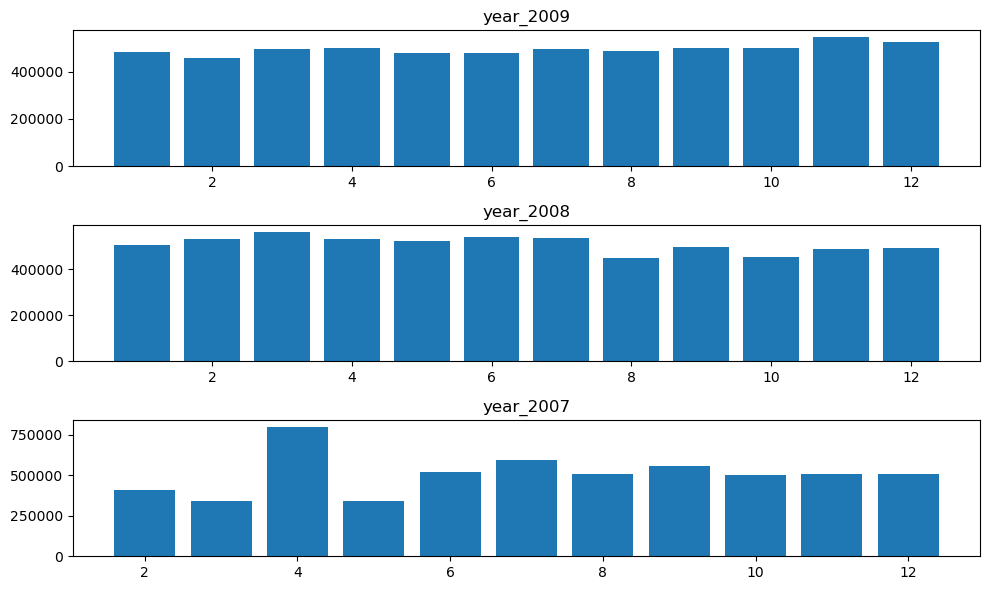

In [313]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,6))

ax[0].bar(result_2009['month'], result_2009['price'])
ax[0].set_title('year_2009')

ax[1].bar(result_2008['month'], result_2008['price'])
ax[1].set_title('year_2008')

ax[2].bar(result_2007['month'], result_2007['price'])
ax[2].set_title('year_2007')

plt.tight_layout()

plt.show()

In [314]:
len(result['year'].unique())

3

In [315]:
type(len(result['year'].unique()))

int

0 2007
1 2008
2 2009


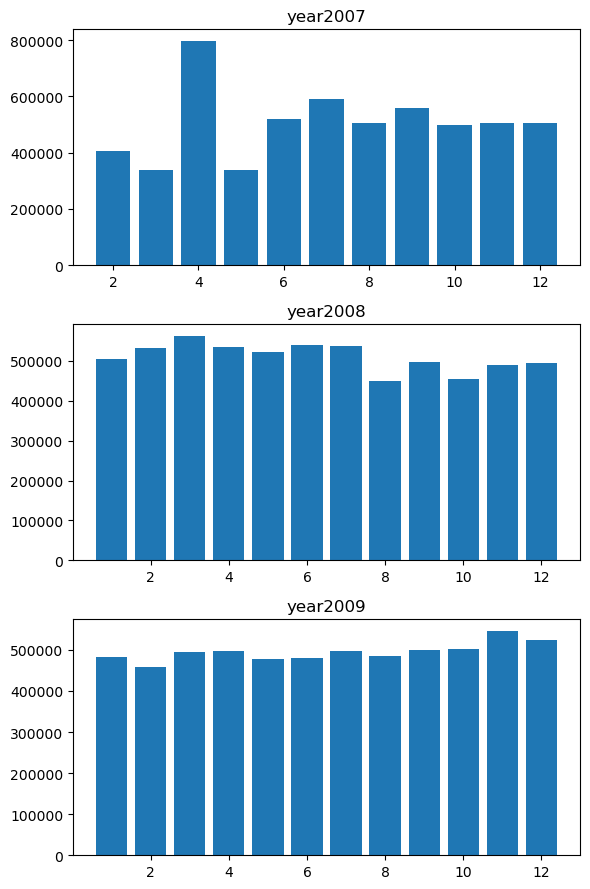

In [316]:

N = int(len(result['year'].unique()))

fig, ax = plt.subplots(nrows=N, ncols=1, figsize=(6, 3*N))

for i, y in enumerate(result['year'].unique()):
    print(i,y)
    
    data = result.loc[result["year"]==y]

    ax[i].bar(data['month'], data['price'])
    ax[i].set_title(f'year{y}')

plt.tight_layout()    
plt.show()

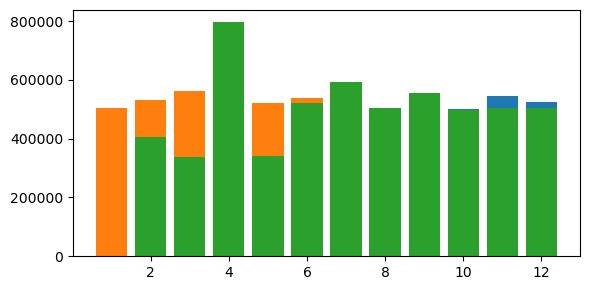

In [317]:
fig, ax = plt.subplots(figsize=(6,3))

ax.bar(result_2009['month'], result_2009['price'])
ax.bar(result_2008['month'], result_2008['price'])
ax.bar(result_2007['month'], result_2007['price'])

plt.tight_layout()
plt.show()


Seaborn - sns

In [318]:
import pandas as pd 
import seaborn as sns

sales

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


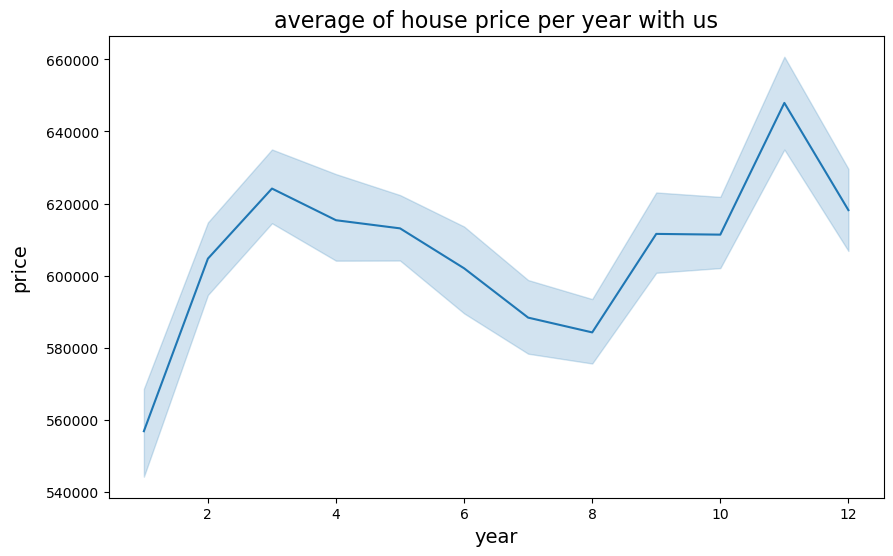

In [319]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data= sales, x = 'month', y='price', ax= ax)
ax.set_title('average of house price per year with us', size=16)
ax.set_xlabel('year', size=14)
ax.set_ylabel('price', size=14, labelpad = 12)
plt.show()


In [320]:
#barplot / outlier (이상치) 제거
#2007 -2010 추출

print(sales.head())
print(sales.tail())

    datesold  postcode   price propertyType  bedrooms  year  month
0 2007-02-07      2607  525000        house         4  2007      2
1 2007-02-27      2906  290000        house         3  2007      2
2 2007-03-07      2905  328000        house         3  2007      3
3 2007-03-09      2905  380000        house         4  2007      3
4 2007-03-21      2906  310000        house         3  2007      3
        datesold  postcode   price propertyType  bedrooms  year  month
29575 2019-07-25      2900  500000         unit         3  2019      7
29576 2019-07-25      2612  560000         unit         2  2019      7
29577 2019-07-26      2912  464950         unit         2  2019      7
29578 2019-07-26      2601  589000         unit         2  2019      7
29579 2019-07-26      2612  775000         unit         2  2019      7


In [321]:
sales['year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [322]:
#이상치 함수 이용할려고 
sales =sales.copy()
sales['year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [323]:
condition = sales['year'].isin([2007,2008,2009,2010])

In [327]:
df = sales.loc[condition, :]

print(df.head())
print(df.tail())

    datesold  postcode   price propertyType  bedrooms  year  month
0 2007-02-07      2607  525000        house         4  2007      2
1 2007-02-27      2906  290000        house         3  2007      2
2 2007-03-07      2905  328000        house         3  2007      3
3 2007-03-09      2905  380000        house         4  2007      3
4 2007-03-21      2906  310000        house         3  2007      3
        datesold  postcode   price propertyType  bedrooms  year  month
24983 2010-12-15      2612  415000         unit         1  2010     12
24984 2010-12-20      2905  350000         unit         2  2010     12
24985 2010-12-21      2612  640000         unit         2  2010     12
24986 2010-12-24      2606  300000         unit         1  2010     12
24987 2010-12-30      2602  389000         unit         2  2010     12


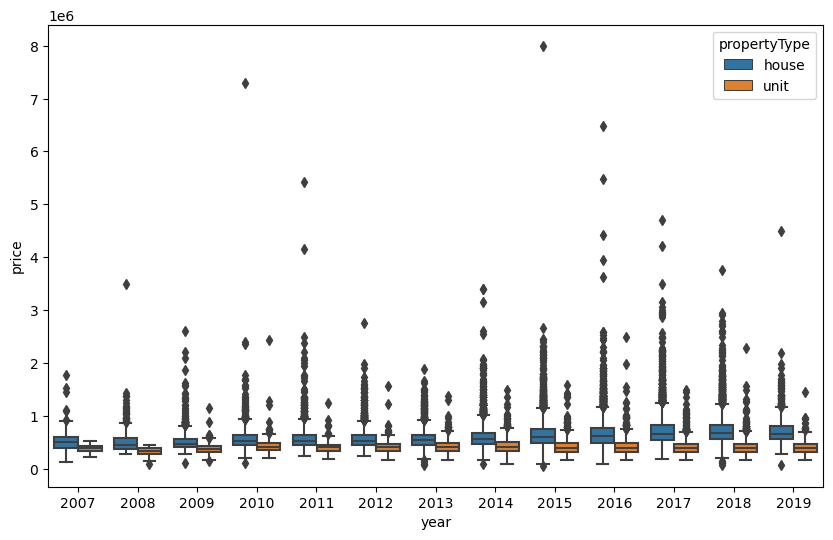

In [332]:
#전체 데이터

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=sales, x='year', y = 'price', hue='propertyType', ax=ax)

plt.show()

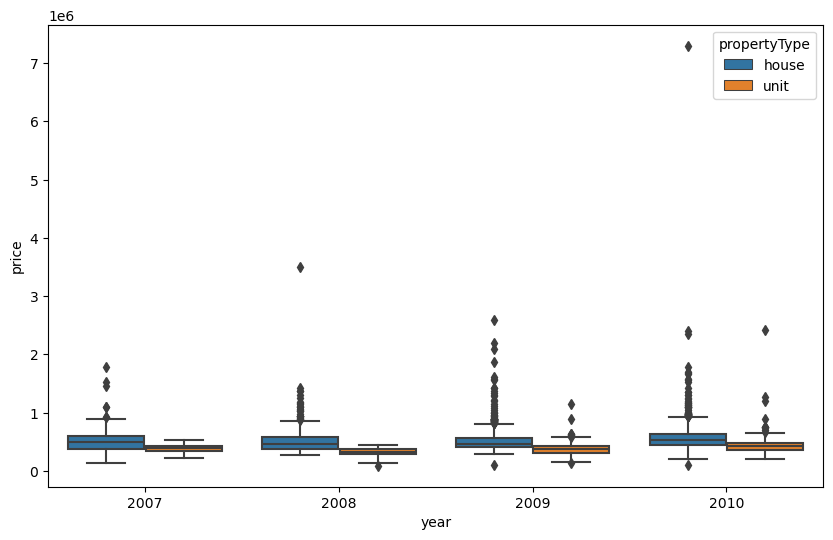

In [333]:
#해당 년도만 가져옴
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df, x='year', y = 'price', hue='propertyType', ax=ax)

plt.show()

이상치

In [339]:
#boxplot 개념

dat = {'values' : [10,12,12,13,12,11,14,13,15,102,12,120,14,14,16,17,19,20]}

temp_df = pd.DataFrame(dat)
temp_df[:5]

,values
0,10
1,12
2,12
3,13
4,12


In [340]:
#1단계 : 사분위수 (Q1, Q3, Q2=median, IQR)

Q1 = temp_df['values'].quantile(0.25)
Q3 = temp_df['values'].quantile(0.75)

IQR = Q3 - Q1 

print(Q1)
print(Q3)
print(IQR)


12.0
16.75
4.75


In [341]:
#2단계 : 이상치 임계값(threshold) 설정 

lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가


print(lower_bound)
print(upper_bound)


4.875
23.875


In [342]:
#이상치의 조건
condition = (temp_df['values'] < lower_bound) | (temp_df['values'] > upper_bound)

In [343]:
#3단계 : 이상치 확인 

temp_df.loc[condition, :]

,values
9,102
11,120


In [344]:
outlier = temp_df.loc[condition,:]

In [345]:
#outlier 제외한 값 추출 loc[~,:] ~은 제외한다 
temp_df.loc[~condition, :] 

,values
0,10
1,12
2,12
3,13
4,12
5,11
6,14
7,13
8,15
10,12


In [348]:
#4단계 : 이상치 처리 (제거)

#1)제거 
df_clean = temp_df.loc[~condition, :] 
print(df_clean)

    values
0       10
1       12
2       12
3       13
4       12
5       11
6       14
7       13
8       15
10      12
12      14
13      14
14      16
15      17
16      19
17      20


In [352]:
temp_upper = temp_df.copy()
temp_upper.head()

,values
0,10
1,12
2,12
3,13
4,12


In [354]:
#2)upper_bound에 편입


temp_upper['values'] = round(temp_upper['values'].apply(lambda x : min(x, upper_bound)),1)
temp_upper

,values
0,10.0
1,12.0
2,12.0
3,13.0
4,12.0
5,11.0
6,14.0
7,13.0
8,15.0
9,23.9


In [360]:
#이상치 제거 함수 만들기 

def remove_outlier(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - (1.5 * IQR) #하한가
    upper_bound = Q3 + (1.5 * IQR) #상한가

    condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    outliers = df.loc[condition,:]
    
    df_clean = df.loc[~condition, :].reset_index(drop=True) 
    
    return df_clean, outliers


In [362]:
df_clean, outliers = remove_outlier(df, 'price')

In [363]:
df_clean

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
3576,2010-12-15,2612,415000,unit,1,2010,12
3577,2010-12-20,2905,350000,unit,2,2010,12
3578,2010-12-21,2612,640000,unit,2,2010,12
3579,2010-12-24,2606,300000,unit,1,2010,12


In [364]:
outliers

,datesold,postcode,price,propertyType,bedrooms,year,month
7,2007-04-30,2606,1530000,house,4,2007,4
18,2007-07-07,2602,900000,house,4,2007,7
26,2007-07-21,2603,1780000,house,4,2007,7
60,2007-09-21,2603,1460000,house,5,2007,9
64,2007-09-24,2612,920000,house,4,2007,9
...,...,...,...,...,...,...,...
24769,2009-10-22,2604,890000,unit,2,2009,10
24812,2010-01-22,2604,2425000,unit,3,2010,1
24843,2010-03-19,2604,1200000,unit,2,2010,3
24965,2010-10-29,2600,1275000,unit,3,2010,10


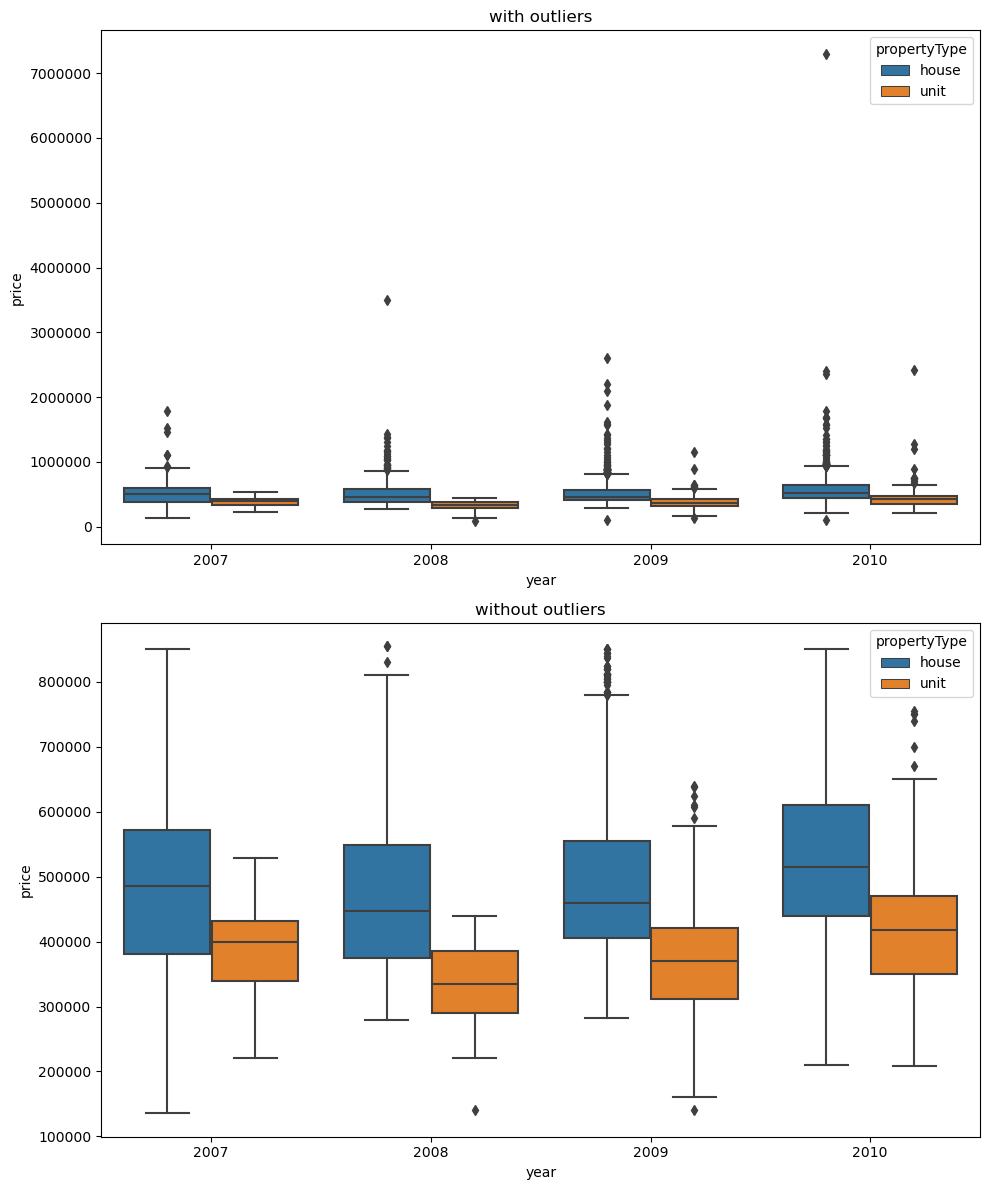

In [367]:
#2007-2010 추출 결과 데이터 시각화 

from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter()
formatter.set_scientific(False)
#과학적 표기법 비활성 설정 
fig, ax = plt.subplots(nrows=2, figsize=(10,12))
sns.boxplot(data=df, x = 'year', y ='price', hue='propertyType', ax=ax[0])

ax[0].set_title("with outliers")
ax[0].yaxis.set_major_formatter(formatter)

sns.boxplot(data=df_clean, x = 'year', y ='price', hue='propertyType', ax=ax[1])

ax[1].set_title("without outliers")
plt.tight_layout()
plt.show()